In [1]:
import os
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
from PIL import Image

In [12]:
data_folder = '../data'
with open(os.path.join(data_folder, 'train.json')) as file:
    json_file = json.load(file)

In [3]:
coco = COCO(os.path.join(data_folder, 'train.json'))

loading annotations into memory...
Done (t=4.02s)
creating index...
index created!


Image Size: (height)-512, (width)-512
{'background': 0, 'General trash': 0, 'Paper': 0, 'Paper pack': 1, 'Metal': 0, 'Glass': 0, 'Plastic': 1, 'Styrofoam': 0, 'Plastic bag': 2, 'Battery': 0, 'Clothing': 0}


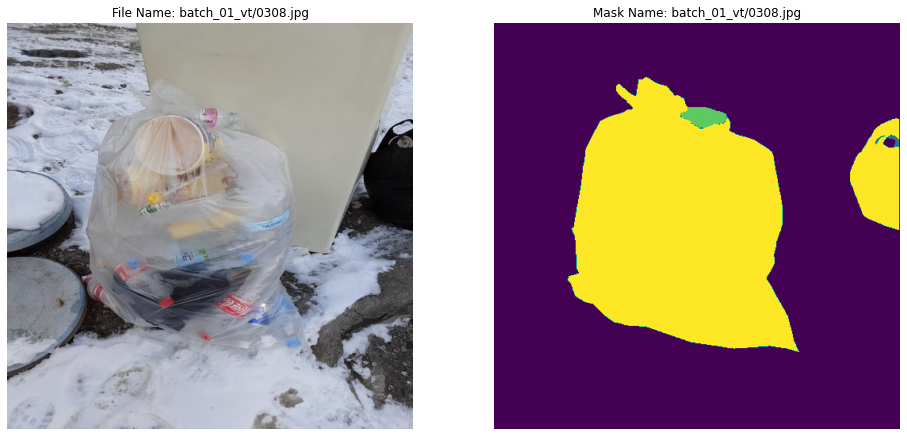

In [26]:
index = 200

img_file = os.path.join(data_folder, json_file['images'][index]['file_name'])
img = Image.open(img_file)
img = np.array(img)

image_id = coco.getImgIds(imgIds=index)
image_infos = coco.loadImgs(image_id)[0]

ann_ids = coco.getAnnIds(imgIds=image_infos['id'])
anns = coco.loadAnns(ann_ids)
anns = sorted(anns, key=lambda idx : idx['area'], reverse=True) # 큰 사물부터 칠해야 하기 때문에 영역 크기의 내림차순으로 정렬한다.

cat_ids = coco.getCatIds()
cats = coco.loadCats(cat_ids)
categories_name = ['background', 'General trash', 'Paper', 'Paper pack', 'Metal', 'Glass', 'Plastic', 'Styrofoam', 'Plastic bag', 'Battery', 'Clothing']
categories = {}
for name in categories_name:
    categories[name]=0

mask = np.zeros((image_infos["height"], image_infos["width"]))
for i in range(len(anns)):
    class_num = anns[i]['category_id']
    categories[categories_name[class_num]]+=1
    mask[coco.annToMask(anns[i]) == 1] = class_num

print(f'Image Size: (height)-{image_infos["height"]}, (width)-{image_infos["width"]}')
print(categories)
fig, axs = plt.subplots(ncols=2, nrows=1, figsize=(16, 15))
axs[0].imshow(img)
axs[0].set_title('File Name: {}'.format(image_infos['file_name']))
axs[0].axis('off')
axs[1].imshow(mask)
axs[1].set_title('Mask Name: {}'.format(image_infos['file_name']))
axs[1].axis('off')
plt.show()